In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
!ls cd ../data/raw/

ls: cd: No such file or directory
../data/raw/:
TsaThroughput.ANC.csv   TsaThroughput.FLL.csv   TsaThroughput.PHX.csv
TsaThroughput.ATL.csv   TsaThroughput.LAS.csv   TsaThroughput.SEA.csv
TsaThroughput.All.csv   TsaThroughput.LAX.csv   TsaThroughput.SFO.csv
TsaThroughput.BOI.csv   TsaThroughput.MCO.csv   TsaThroughput.SJC.csv
TsaThroughput.BZN.csv   TsaThroughput.MIA.csv   TsaThroughput.TPA.csv
TsaThroughput.DEN.csv   TsaThroughput.MSO.csv   TsaThroughput.Total.csv
TsaThroughput.DFW.csv   TsaThroughput.PDX.csv


In [4]:
airports_list = ['ANC', 'ATL', 'All', 'BOI', 'BZN', 'DEN', 'DFW', 'FLL', 'LAS', 'LAX', 
                 'MCO', 'MIA', 'PDX', 'PHX', 'SEA', 'SFO', 'SJC', 'TPA', 'Total']

In [5]:
df_list = []
  
for i in range(len(airports_list)):
    temp_df = pd.read_csv("../data/raw/TsaThroughput."+airports_list[i]+".csv")
    df_list.append(temp_df)

In [7]:
airport_dict =dict(zip(airports_list,df_list))

In [8]:
# Clean and plot a timeseries for a given airport

def clean_and_plot_airport_df(df, time_range, airport_name=None):
    '''Removes NA values, sets index to datetime and
    plots timeseries for a given time range and airport'''
    
    # Fill na
    df = df.fillna(0)
    
    # Set index to datetime
    df.index = pd.to_datetime(df['Date'] + ' ' + df['Hour'])
    df = df.drop(columns=['Date', 'Hour'])
    
    # Sum across values from each gate to get total for a given date and time (up to the hour)
    df = pd.DataFrame(df.sum(axis=1))
    df.rename(columns={0:airport_name}, inplace=True)
    
    # Plot the timeseries 
    fig, ax = plt.subplots(figsize=(15,7))
    df.loc[time_range].plot(kind = 'line', ax=ax)
    ax.set_ylabel('Throughput (count)')
    ax.set_title(airport_name + ' ' + time_range)
    plt.show()
    
    return df

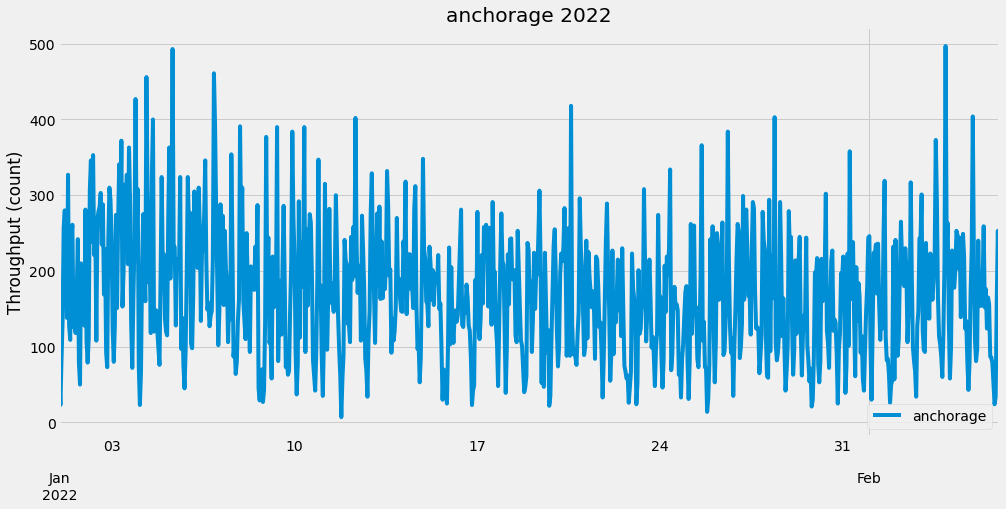

,anchorage
2018-12-30 00:00:00,115.0
2018-12-30 01:00:00,14.0
2018-12-30 02:00:00,29.0
2018-12-30 03:00:00,115.0
2018-12-30 04:00:00,305.0
...,...
2022-02-05 19:00:00,24.0
2022-02-05 20:00:00,34.0
2022-02-05 21:00:00,159.0
2022-02-05 22:00:00,253.0


In [11]:
clean_and_plot_airport_df(airport_dict.get('ANC'), '2022', 'anchorage')